# **TASK-1 D**

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

API_KEY = "M2ZF4PZRN7LGJSFC4HX2E5PQ2"
BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"


cities = [
    "Mumbai", "Delhi", "Bangalore", "Hyderabad", "Ahmedabad", "Chennai", "Kolkata",
    "Pune", "Jaipur", "Lucknow", "Kanpur", "Nagpur", "Indore", "Thane", "Bhopal",
    "Visakhapatnam", "Patna", "Vadodara", "Ghaziabad", "Ludhiana"
]

def fetch_historical_weather(city):
    url = f"{BASE_URL}{city}/last30days?unitGroup=metric&key={API_KEY}&contentType=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        records = []
        for day in data.get("days", []):
            records.append({
                "Date": day["datetime"],
                "City": city,
                "Temperature (C)": day["temp"],
                "Humidity (%)": day["humidity"],
                "Wind Speed (m/s)": day["windspeed"]
            })
        return records
    return []

# Collecting weather data for the past 30 days
data = []
for city in cities:
    print(f"Fetching past data for {city}")
    data.extend(fetch_historical_weather(city))

df = pd.DataFrame(data)
df.to_csv("india_historical_weather.csv", index=False)
print("Data collection complete. CSV file saved.")


Fetching past data for Mumbai
Fetching past data for Delhi
Fetching past data for Bangalore
Fetching past data for Hyderabad
Fetching past data for Ahmedabad
Fetching past data for Chennai
Fetching past data for Kolkata
Fetching past data for Pune
Fetching past data for Jaipur
Fetching past data for Lucknow
Fetching past data for Kanpur
Fetching past data for Nagpur
Fetching past data for Indore
Fetching past data for Thane
Fetching past data for Bhopal
Fetching past data for Visakhapatnam
Fetching past data for Patna
Fetching past data for Vadodara
Fetching past data for Ghaziabad
Fetching past data for Ludhiana
Data collection complete. CSV file saved.


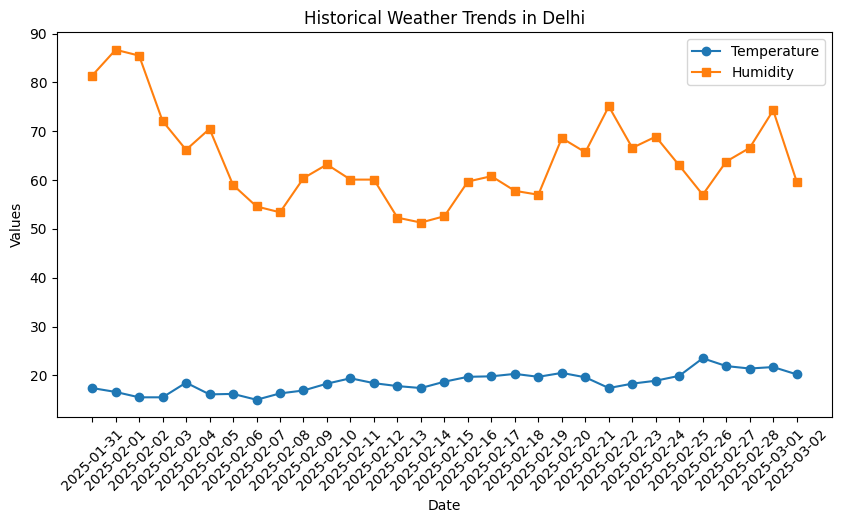

In [8]:
df = pd.read_csv('/content/india_historical_weather.csv')
sample_city = "Delhi"
df_city = df[df["City"] == sample_city]
plt.figure(figsize=(10,5))
plt.plot(df_city["Date"], df_city["Temperature (C)"], label="Temperature", marker='o')
plt.plot(df_city["Date"], df_city["Humidity (%)"], label="Humidity", marker='s')
plt.xlabel("Date")
plt.ylabel("Values")
plt.title(f"Historical Weather Trends in {sample_city}")
plt.legend()
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-004189d9624c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="City", y="Humidity (%)", palette="Set2")


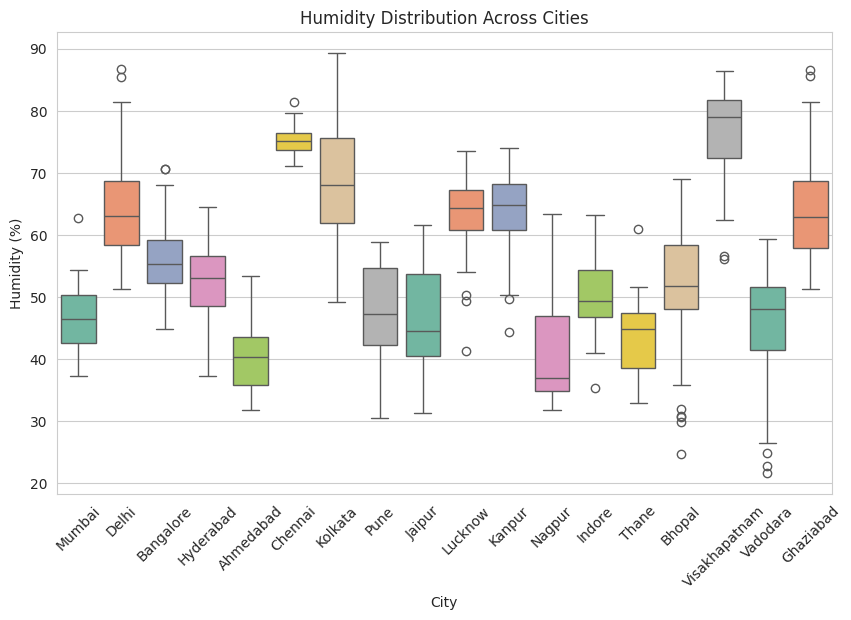

In [13]:
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="City", y="Humidity (%)", palette="Set2")
plt.title("Humidity Distribution Across Cities")
plt.xlabel("City")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-946bdac0ef9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_temp.index, y=city_avg_temp.values, palette="coolwarm")


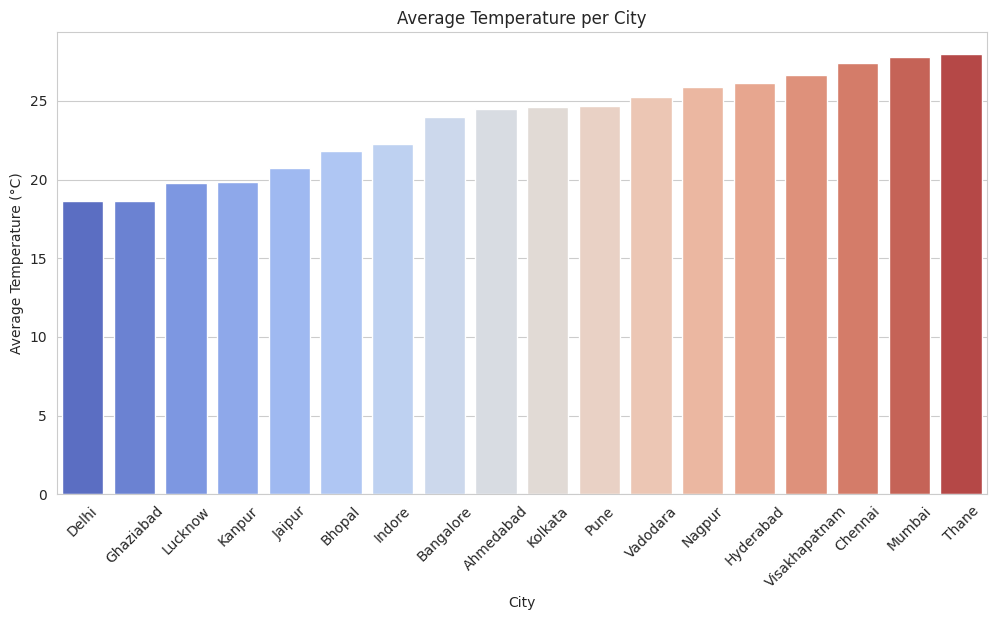

In [12]:
plt.figure(figsize=(12, 6))
city_avg_temp = df.groupby("City")["Temperature (C)"].mean().sort_values()
sns.barplot(x=city_avg_temp.index, y=city_avg_temp.values, palette="coolwarm")
plt.title("Average Temperature per City")
plt.xlabel("City")
plt.ylabel("Average Temperature (°C)")
plt.xticks(rotation=45)
plt.show()